<a href="https://colab.research.google.com/github/catastropiyush/spectroscopy/blob/main/spectrometer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install smplotlib
import smplotlib as smp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.1/424.1 kB 5.7 MB/s eta 0:00:00


Upload your spectrum image:


Saving bluesign_spectrum.jpg to bluesign_spectrum (2).jpg


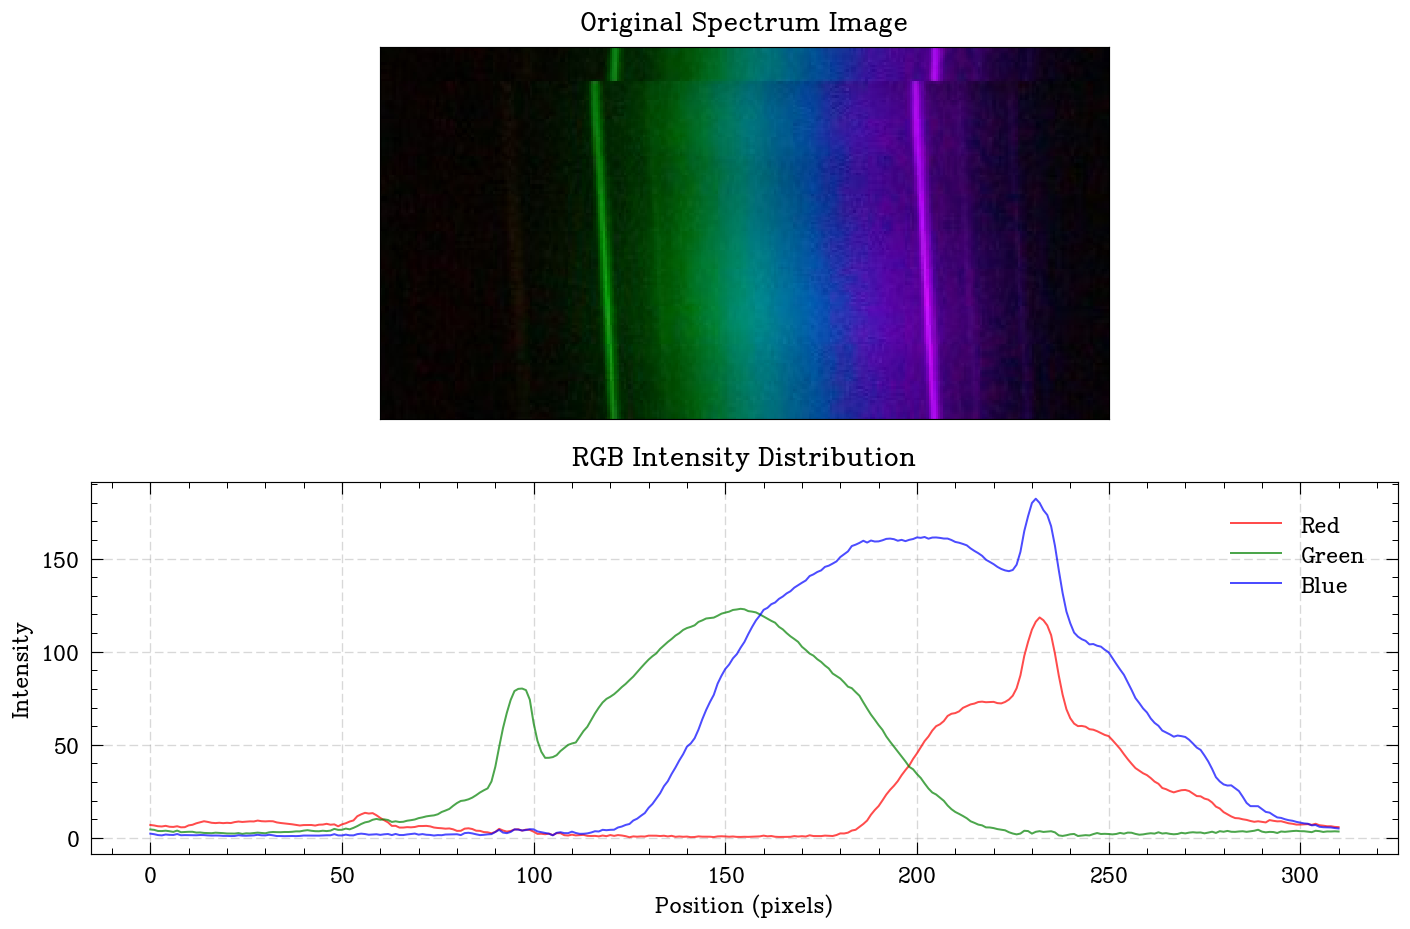

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

def analyze_spectrum(image_path):
    # Load and convert image to numpy array
    img = Image.open(image_path)
    img_array = np.array(img)

    # Get image dimensions
    height, width = img_array.shape[:2]

    # Extract RGB channels
    r_channel = img_array[:, :, 0]
    g_channel = img_array[:, :, 1]
    b_channel = img_array[:, :, 2]

    # Calculate average intensity across each vertical column
    r_intensity = np.mean(r_channel, axis=0)
    g_intensity = np.mean(g_channel, axis=0)
    b_intensity = np.mean(b_channel, axis=0)

    # Create x-axis values
    x_values = np.arange(width)

    # Create subplot figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # Display original image in first subplot
    ax1.imshow(img_array)
    ax1.set_title('Original Spectrum Image')
    ax1.set_xticks([])
    ax1.set_yticks([])

    # Plot intensity curves in second subplot
    ax2.plot(x_values, r_intensity, 'r-', label='Red', alpha=0.7)
    ax2.plot(x_values, g_intensity, 'g-', label='Green', alpha=0.7)
    ax2.plot(x_values, b_intensity, 'b-', label='Blue', alpha=0.7)

    ax2.set_title('RGB Intensity Distribution')
    ax2.set_xlabel('Position (pixels)')
    ax2.set_ylabel('Intensity')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return r_intensity, g_intensity, b_intensity

# Code to run in Colab
print("Upload your spectrum image:")
uploaded = files.upload()

# Get the filename of the uploaded file
filename = list(uploaded.keys())[0]

# Analyze the spectrum
r_intensity, g_intensity, b_intensity = analyze_spectrum(filename)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import pandas as pd
from scipy.signal import find_peaks

In [1]:
def analyze_spectrum(image_path, prominence=20, width=5):
    # Load and convert image to numpy array
    img = Image.open(image_path)
    img_array = np.array(img)

    # Get image dimensions
    height, width_px = img_array.shape[:2]

    # Extract RGB channels
    r_channel = img_array[:, :, 0]
    g_channel = img_array[:, :, 1]
    b_channel = img_array[:, :, 2]

    # Calculate average intensity across each vertical column
    r_intensity = np.mean(r_channel, axis=0)
    g_intensity = np.mean(g_channel, axis=0)
    b_intensity = np.mean(b_channel, axis=0)

    # Find peaks for each channel
    r_peaks, r_properties = find_peaks(r_intensity, prominence=prominence, width=width)
    g_peaks, g_properties = find_peaks(g_intensity, prominence=prominence, width=width)
    b_peaks, b_properties = find_peaks(b_intensity, prominence=prominence, width=width)

    # Create x-axis values
    x_values = np.arange(width_px)

    # Create subplot figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # Display original image in first subplot
    ax1.imshow(img_array)
    ax1.set_title('Original Spectrum Image')
    ax1.set_xticks([])
    ax1.set_yticks([])

    # Plot intensity curves and peaks in second subplot
    ax2.plot(x_values, r_intensity, 'r-', label='Red', alpha=0.7)
    ax2.plot(x_values, g_intensity, 'g-', label='Green', alpha=0.7)
    ax2.plot(x_values, b_intensity, 'b-', label='Blue', alpha=0.7)

    # Plot peaks
    ax2.plot(r_peaks, r_intensity[r_peaks], "ro", label='Red peaks')
    ax2.plot(g_peaks, g_intensity[g_peaks], "go", label='Green peaks')
    ax2.plot(b_peaks, b_intensity[b_peaks], "bo", label='Blue peaks')

    ax2.set_title('RGB Intensity Distribution with Peaks')
    ax2.set_xlabel('Position (pixels)')
    ax2.set_ylabel('Intensity')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Create DataFrames for peaks
    peaks_data = []

    for peak_pos, intensity in zip(r_peaks, r_intensity[r_peaks]):
        peaks_data.append({
            'Channel': 'Red',
            'Position': peak_pos,
            'Intensity': intensity
        })

    for peak_pos, intensity in zip(g_peaks, g_intensity[g_peaks]):
        peaks_data.append({
            'Channel': 'Green',
            'Position': peak_pos,
            'Intensity': intensity
        })

    for peak_pos, intensity in zip(b_peaks, b_intensity[b_peaks]):
        peaks_data.append({
            'Channel': 'Blue',
            'Position': peak_pos,
            'Intensity': intensity
        })

    peaks_df = pd.DataFrame(peaks_data)
    peaks_df = peaks_df.sort_values('Position')
    peaks_df = peaks_df.reset_index(drop=True)

    return peaks_df, (r_intensity, g_intensity, b_intensity)

Upload your spectrum image:


Saving bluesign_spectrum.jpg to bluesign_spectrum.jpg


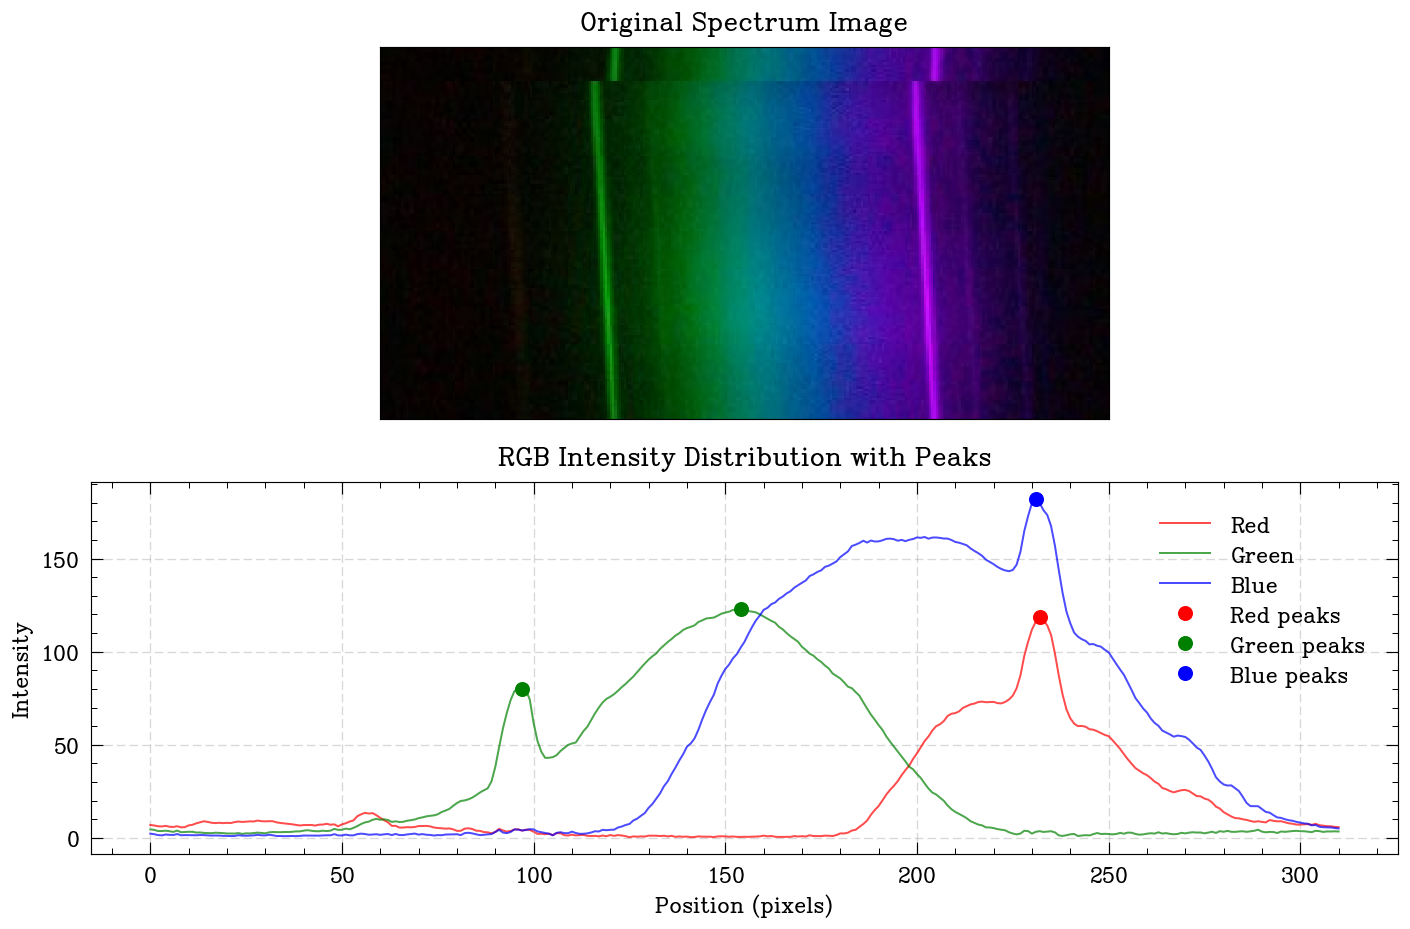


Detected Peaks:
  Channel  Position   Intensity
0   Green        97   80.226415
1   Green       154  123.044025
2    Blue       231  182.157233
3     Red       232  118.402516

Peaks data has been saved to 'spectrum_peaks.csv'


In [4]:
# Code to run in Colab
print("Upload your spectrum image:")
uploaded = files.upload()

# Get the filename of the uploaded file
filename = list(uploaded.keys())[0]

# Analyze the spectrum and get peaks DataFrame
peaks_df, intensities = analyze_spectrum(filename)

# Display the peaks DataFrame
print("\nDetected Peaks:")
print(peaks_df)

# Optional: Save to CSV
peaks_df.to_csv('spectrum_peaks.csv', index=False)
print("\nPeaks data has been saved to 'spectrum_peaks.csv'")

Upload your spectrum image:


Saving metal_halide_spectrum.jpg to metal_halide_spectrum (1).jpg


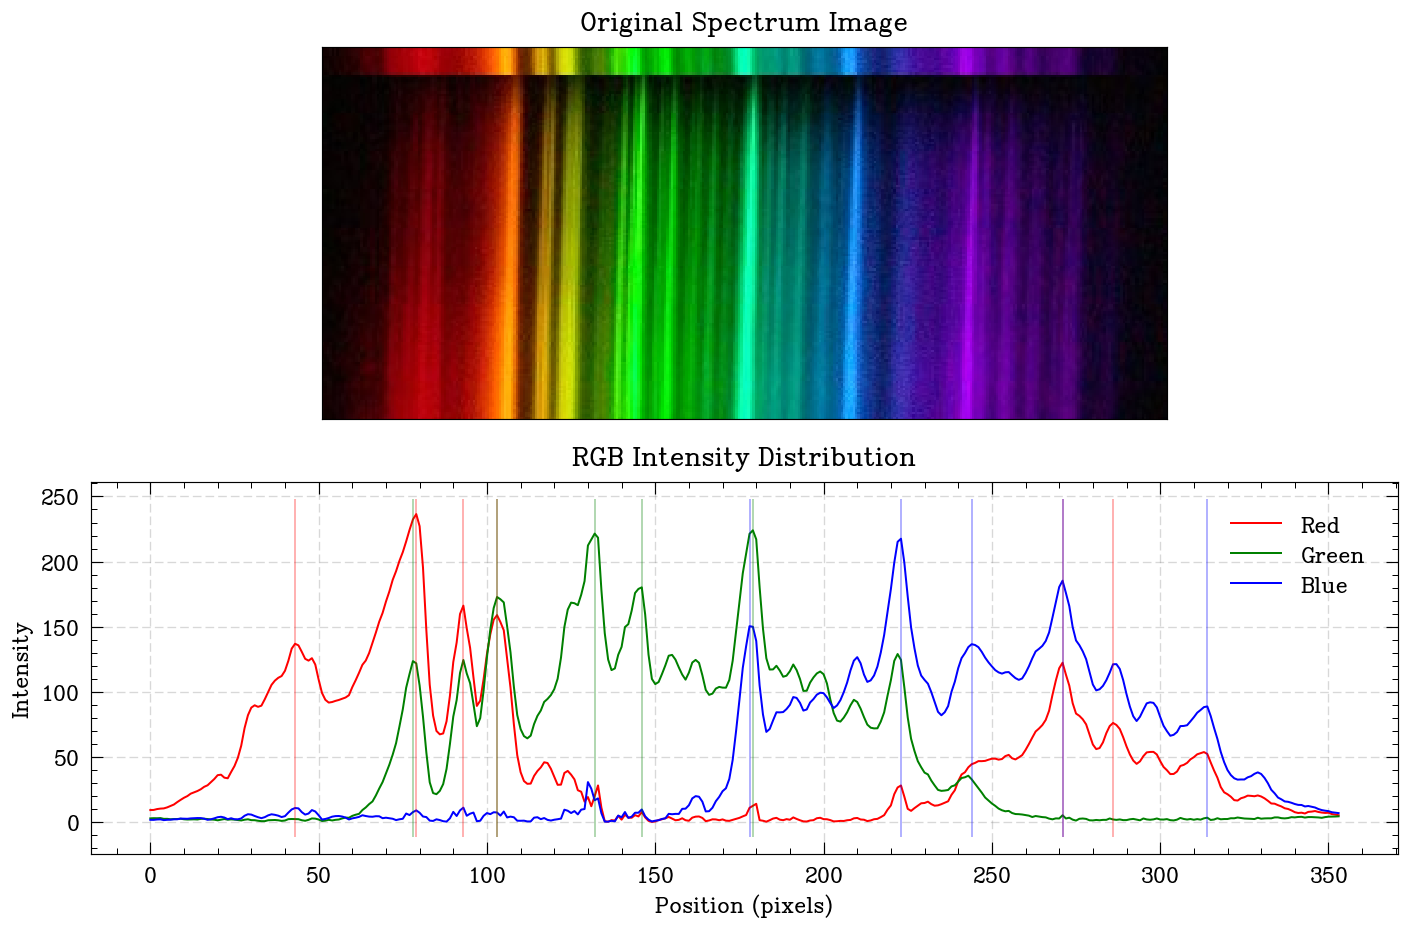


Detected Peaks:
   Channel  Position   Intensity
0      Red        43  136.980769
1    Green        78  123.647436
2      Red        79  236.461538
3      Red        93  166.217949
4      Red       103  158.942308
5    Green       103  172.846154
6    Green       132  221.487179
7    Green       146  180.275641
8     Blue       178  150.455128
9    Green       179  224.019231
10    Blue       223  217.576923
11    Blue       244  136.660256
12     Red       271  122.442308
13    Blue       271  185.384615
14     Red       286   76.217949
15    Blue       314   88.884615

Peaks data has been saved to 'spectrum_peaks.csv'


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import pandas as pd
from scipy.signal import find_peaks

def analyze_spectrum(image_path, prominence=20, width=5):
    # Load and convert image to numpy array
    img = Image.open(image_path)
    img_array = np.array(img)

    # Extract RGB channels and calculate average intensity
    r_intensity = np.mean(img_array[:, :, 0], axis=0)
    g_intensity = np.mean(img_array[:, :, 1], axis=0)
    b_intensity = np.mean(img_array[:, :, 2], axis=0)

    # Find peaks for each channel
    r_peaks, _ = find_peaks(r_intensity, prominence=prominence, width=width)
    g_peaks, _ = find_peaks(g_intensity, prominence=prominence, width=width)
    b_peaks, _ = find_peaks(b_intensity, prominence=prominence, width=width)

    # Create plots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # Display original image
    ax1.imshow(img_array)
    ax1.set_title('Original Spectrum Image')
    ax1.set_xticks([])
    ax1.set_yticks([])

    # Plot intensities
    x_values = np.arange(len(r_intensity))
    ax2.plot(x_values, r_intensity, 'r-', label='Red')
    ax2.plot(x_values, g_intensity, 'g-', label='Green')
    ax2.plot(x_values, b_intensity, 'b-', label='Blue')

    # Add vertical lines at peaks
    ymin, ymax = ax2.get_ylim()
    for peak in r_peaks:
        ax2.vlines(x=peak, ymin=ymin, ymax=ymax, colors='red', alpha=0.3)
    for peak in g_peaks:
        ax2.vlines(x=peak, ymin=ymin, ymax=ymax, colors='green', alpha=0.3)
    for peak in b_peaks:
        ax2.vlines(x=peak, ymin=ymin, ymax=ymax, colors='blue', alpha=0.3)

    ax2.set_title('RGB Intensity Distribution')
    ax2.set_xlabel('Position (pixels)')
    ax2.set_ylabel('Intensity')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Create DataFrame with peaks
    peaks_data = []
    for peaks, intensity, channel in [
        (r_peaks, r_intensity, 'Red'),
        (g_peaks, g_intensity, 'Green'),
        (b_peaks, b_intensity, 'Blue')
    ]:
        for peak in peaks:
            peaks_data.append({
                'Channel': channel,
                'Position': peak,
                'Intensity': intensity[peak]
            })

    peaks_df = pd.DataFrame(peaks_data)
    peaks_df = peaks_df.sort_values('Position').reset_index(drop=True)

    return peaks_df

# Run the analysis
print("Upload your spectrum image:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Analyze spectrum and get peaks
peaks_df = analyze_spectrum(filename)

# Display and save results
print("\nDetected Peaks:")
print(peaks_df)
peaks_df.to_csv('spectrum_peaks.csv', index=False)
print("\nPeaks data has been saved to 'spectrum_peaks.csv'")

Upload your spectrum image:


Saving bluesign_spectrum.jpg to bluesign_spectrum (2).jpg


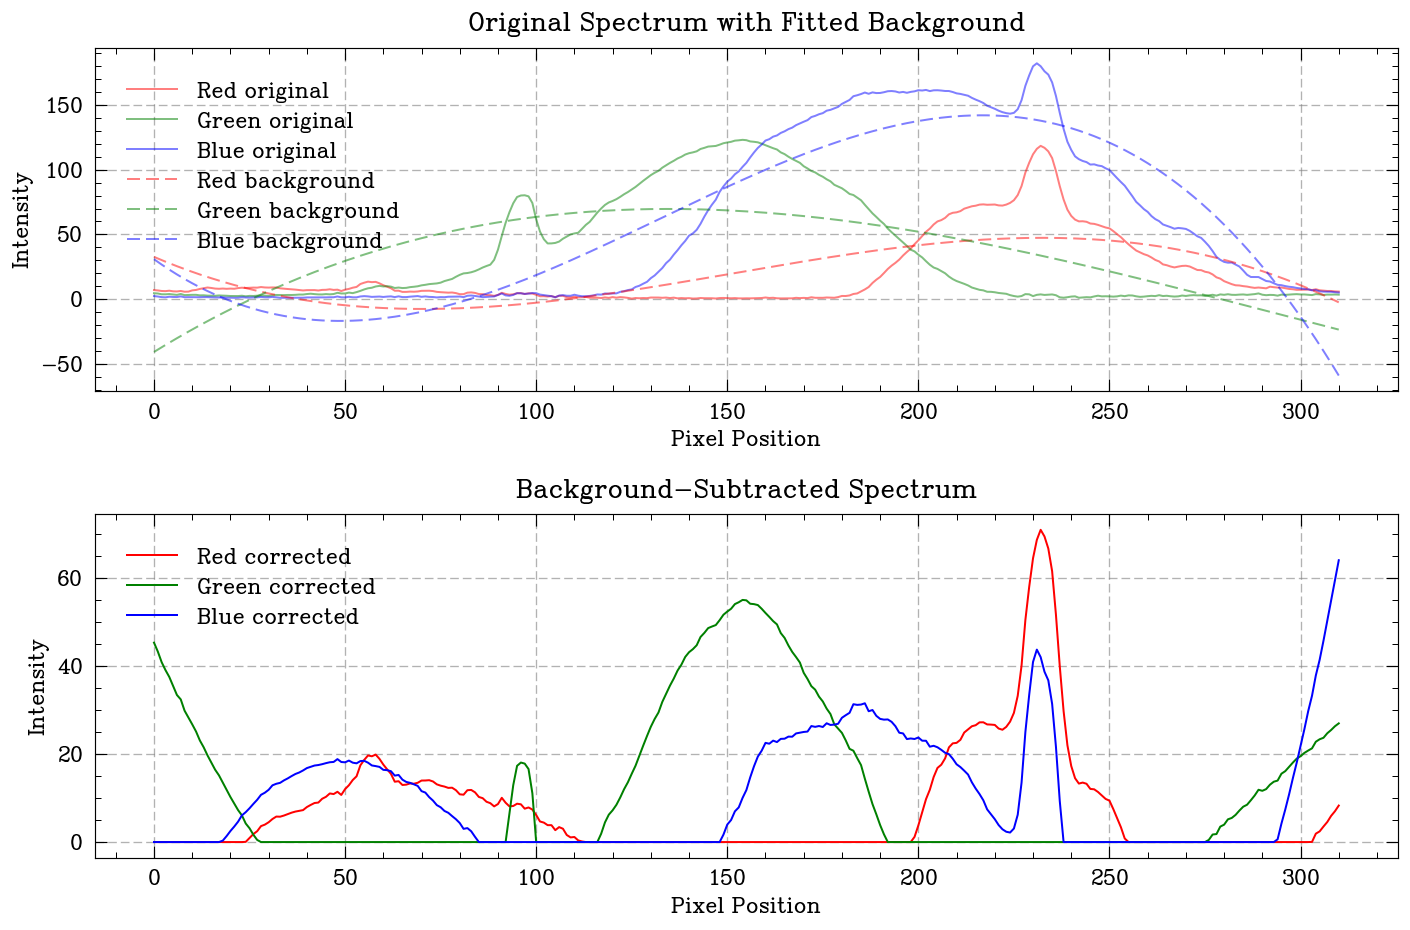


To adjust background subtraction, modify poly_order in subtract_background()
Current polynomial order = 3


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# Upload and load the image
print("Upload your spectrum image:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load image and get intensity profile
img = Image.open(filename)
img_array = np.array(img)

# Get average intensity for each channel
r_intensity = np.mean(img_array[:, :, 0], axis=0)
g_intensity = np.mean(img_array[:, :, 1], axis=0)
b_intensity = np.mean(img_array[:, :, 2], axis=0)

# Function to subtract background
def subtract_background(intensity, poly_order=3):
    x = np.arange(len(intensity))
    # Fit polynomial to the data
    coeffs = np.polyfit(x, intensity, poly_order)
    background = np.polyval(coeffs, x)
    # Subtract background and ensure no negative values
    corrected = intensity - background
    corrected[corrected < 0] = 0
    return corrected, background

# Perform background subtraction for each channel
r_corrected, r_background = subtract_background(r_intensity)
g_corrected, g_background = subtract_background(g_intensity)
b_corrected, b_background = subtract_background(b_intensity)

# Plot results
plt.figure(figsize=(12, 8))

# Original data with fitted background
plt.subplot(211)
plt.plot(r_intensity, 'r-', label='Red original', alpha=0.5)
plt.plot(g_intensity, 'g-', label='Green original', alpha=0.5)
plt.plot(b_intensity, 'b-', label='Blue original', alpha=0.5)
plt.plot(r_background, 'r--', label='Red background', alpha=0.5)
plt.plot(g_background, 'g--', label='Green background', alpha=0.5)
plt.plot(b_background, 'b--', label='Blue background', alpha=0.5)
plt.title('Original Spectrum with Fitted Background')
plt.xlabel('Pixel Position')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True)

# Background-subtracted data
plt.subplot(212)
plt.plot(r_corrected, 'r-', label='Red corrected')
plt.plot(g_corrected, 'g-', label='Green corrected')
plt.plot(b_corrected, 'b-', label='Blue corrected')
plt.title('Background-Subtracted Spectrum')
plt.xlabel('Pixel Position')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Save the corrected data
corrected_data = {
    'pixel': np.arange(len(r_intensity)),
    'red': r_corrected,
    'green': g_corrected,
    'blue': b_corrected
}

# You can adjust the polynomial order by changing poly_order in the function call
# Higher order = more flexible background fit
# Lower order = more rigid background fit
print("\nTo adjust background subtraction, modify poly_order in subtract_background()")
print("Current polynomial order = 3")